# Generating Word Cloud for Gilead Sciences

Gilead Sciences, Inc is an American biopharmaceutical company headquartered in Foster City, California that researches, develops and commercializes drugs, focusing primarily on antiviral drugs used in the treatment of HIV, hepatitis B, hepatitis C, and influenza, including Harvoni and Sovaldi. 

This project was created to assist Bencoolen Capital, the champion for HSBC Mergers and Acquisition 2020, to better understand the management focus and motivations of Gilead Sciences for the current year without having to go through the trouble of reading each press release in the year. Upon understanding the Gilead's management focus, they recommended the acquisition of Karyopharm Therapeutics, Inc. 

In this project, I used **web scrapping** to create a word cloud analysis on the press releases for the year to identify the focus of the written materials. 

In [1]:
# conda install -c conda-forge wordcloud

In [2]:
import urllib.parse
import requests
import urllib.request as ur
import wordcloud
# import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### Collating URL of press releases for the year

In [3]:
page_urls = ['http://investors.gilead.com/press-releases?page=0', 'http://investors.gilead.com/press-releases?page=1', 'http://investors.gilead.com/press-releases?page=2',
            'http://investors.gilead.com/press-releases?page=3', 'http://investors.gilead.com/press-releases?page=4', 'http://investors.gilead.com/press-releases?page=5'
]

In [4]:
article_titles = []
for url in page_urls:
    response = requests.get(url)
    data = response.text
    soup = BeautifulSoup(data, 'lxml')

    for link in soup.find_all(class_ = 'press-release-list__right-column col-lg-12'):
        links = link.find_all('a', href=True)
        for l in links:
            if l is None:
                continue
            article_titles.append('http://investors.gilead.com' + l.get('href'))
      
# print(article_titles)

### Remove unnecessary links

In [5]:
for i in range(0, 6):
    while 'http://investors.gilead.com?page=' + str(i) in article_titles: article_titles.remove('http://investors.gilead.com?page=' + str(i))
    i = i + 1

# Check articles
# for article in article_titles:
#     print(article)


### List of Stopwords

In [6]:
file1 = open("g_stopwords.txt") 
lines = file1.read()
stopwords = set(stopwords.words('english'))
stopwords.update(lines.split())

The list of stopwords are from NLTK and text file.

### Data Cleaning and Filtering

In [7]:
result = {}

for article in article_titles:
    req = urllib.request.Request(article, headers={"User-Agent": "Chrome"})
    html = ur.urlopen(req).read()
    soup = BeautifulSoup(html)
    

#     #STEP 1: DATA CLEANING
    
    # kill all script and style elements
    for script in soup.find_all(["script", "style"]):
        script.extract()
            
    for main_content in soup.find_all(class_='col-md-12'):
        text = main_content.get_text()
#     print(text)
    
        # break into lines and remove leading and trailing space on each
        lines = (line.strip() for line in text.splitlines())
        
        # break multi-headlines into a line each
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        
        # drop blank lines
        text = '\n'.join(chunk for chunk in chunks if chunk)
    
    #STEP 2: DATA FILTERING
    
    words = text.split(" ")
    for word in words: 
        y = word.lower()
        if y not in stopwords and y.isalpha():
            if y not in result:
                result[y] = 1
            else:
                result[y]+=1

# print(result)

### Visualization of Word Cloud

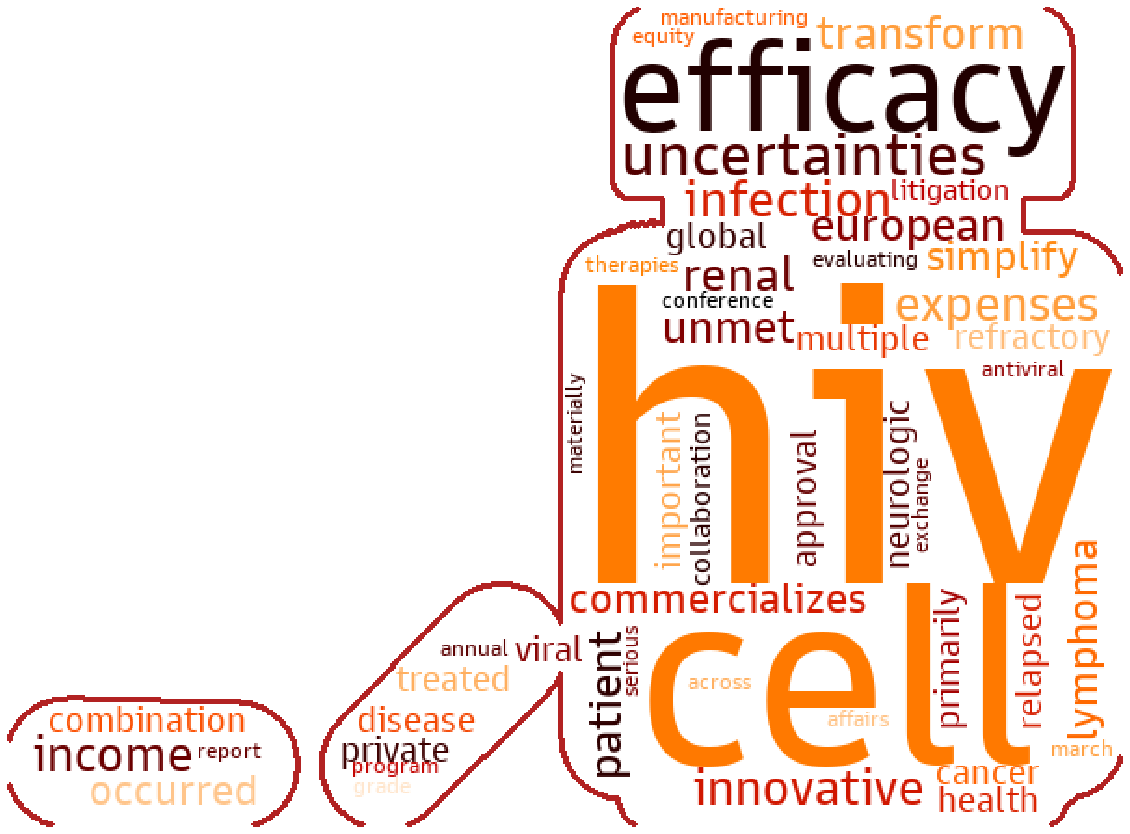

In [8]:
# Change Font
font_path = 'goldman-sans\GoldmanSans_Rg.ttf'

# Change shape of wordcloud to any desired shape
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/6/0/a/1/1258127232729331816ernes_Medicine_-_Drugs.svg.hi.png', stream=True).raw))

cloud = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, colormap='gist_heat', background_color="white", contour_color='firebrick',contour_width=3,
               max_words=50, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

# Normal Word Cloud
# cloud = wordcloud.WordCloud(max_words=50, width=800, height=600, min_font_size=14, colormap='Reds', background_color="white")

cloud.generate_from_frequencies(result)
plt.figure(figsize= (20,20))
plt.imshow(cloud, interpolation = 'nearest')
plt.axis('off')

plt.savefig("medicine.png", format="png")

plt.show()


Its current portfolio is highly dependent on HIV/AIDS segment whcih forms the bulk of its revenue by developing the Oncology profile.

From the words such as "commercializes", "innovative", "efficacy", "transform", we can understand that Gilead Sciences, Inc priortises clinical and commercial activities and focus on high quality science build upon core areas of strength and a corporate strategy Gilead could adopt is to diversify its existing portfolio. 

### Word count for top 5 most common words

In [9]:
# print(result)

from collections import Counter
top = dict(Counter(result).most_common(5))

print(top)

{'hiv': 192, 'cell': 131, 'efficacy': 124, 'uncertainties': 115, 'infection': 78}
